# Data Analysis on Haberman 

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Reading haberman.csv file
hb=pd.read_csv('haberman.csv')

# Q. How many data-points and features are there in haberman.csv data-set?
print(hb.shape)
hb.columns = ['Age','Op_Year','Axil_Nodes','Surv_status']

(305, 4)


#### hb.shape returns a tuple (rows, columns) showing number of data-points by rows (305) and number of columns by columns (4)

In [4]:
# Q. Mention all the features (coloumn names) in haberman data. 
print(hb.columns)

Index(['Age', 'Op_Year', 'Axil_Nodes', 'Surv_status'], dtype='object')


In [5]:
print(hb['Surv_status'].value_counts())
# It's an Imbalanced data set showing 81 people with life expectancy of less than 5 years and 224 people more than 5 years. 
# Here 1 and 2 are classes with corresponding number of data-points.

1    224
2     81
Name: Surv_status, dtype: int64


## Objective:
#### Our objective is to perform EDA on Haberman data. This data shows the life expectancy of 305 recorded persons in two categories:
1. Life expectancy of less than 5 years
2. Life expectancy of 5 or more years

#### This data has featured 4 features which shows 
1. Age at the time of operation.
2. Operation Year
3. Number of positive auxillary nodes
4. Survival Status
    * Class 1: the patient survived 5 years or longer 
    * Class 2: the patient died within 5 year  

#### Our objective limits to such an analysis so that persons with different survival status could be differentiated easily.

In [6]:
hb_1 = hb.loc[ hb['Surv_status'] == 1 ]
hb_2 = hb.loc[ hb['Surv_status'] == 2 ]
print(hb_1.head())
print("******************************************")
print("******************************************")
print(hb_2.head())

   Age  Op_Year  Axil_Nodes  Surv_status
0   30       62           3            1
1   30       65           0            1
2   31       59           2            1
3   31       65           4            1
4   33       58          10            1
******************************************
******************************************
    Age  Op_Year  Axil_Nodes  Surv_status
6    34       59           0            2
7    34       66           9            2
23   38       69          21            2
33   39       66           0            2
42   41       60          23            2


## Univariate Analysis

### *1. PDF and CDF Analysis on Haberman*

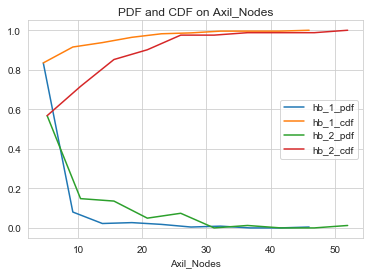

In [44]:
#PDF n CDF on Axil_Nodes
counts, bin_edges = np.histogram(hb_1['Axil_Nodes'], bins=10, density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(hb_2['Axil_Nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Axil_Nodes')
plt.title('PDF and CDF on Axil_Nodes')
plt.legend(['hb_1_pdf','hb_1_cdf','hb_2_pdf','hb_2_cdf'])

plt.show()

#### Observation:
1. hb_1 graph shows that 96% of patients had Axil_Nodes less than ~21.
2. hb_2 graph shows that 96% of patients had Axil_Nodes less than ~26 but probability of patients(in hb_2) at initital stage is comaparetively low at initital stage(0.0+). 

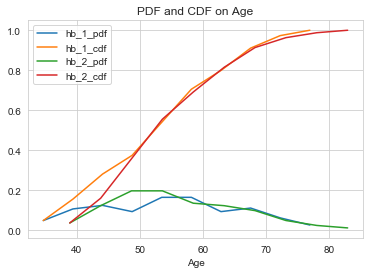

In [36]:
# PDF n CDF on Age
counts, bin_edges = np.histogram(hb_1['Age'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(hb_2['Age'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Age')
plt.title('PDF and CDF on Age')
plt.legend(['hb_1_pdf','hb_1_cdf','hb_2_pdf','hb_2_cdf'])

plt.show()

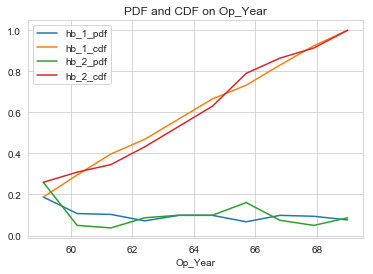

In [45]:
# PDF n CDF on Op_Year
counts, bin_edges = np.histogram(hb_1['Op_Year'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(hb_2['Op_Year'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel('Op_Year')
plt.title('PDF and CDF on Op_Year')
plt.legend(['hb_1_pdf','hb_1_cdf','hb_2_pdf','hb_2_cdf'])


plt.show()

#### Conclusion:
1. Operations every year are almost eqally occurred as PDF of both hb_1 and hb_2 doesn't vary too much.

### *2. Box Plot Analysis on Haberman*

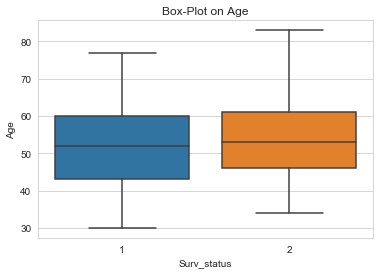

In [42]:
# Box-Plot on Age
sns.boxplot(y='Age', x='Surv_status', data=hb)
plt.title('Box-Plot on Age')

plt.show()

* No significant observation here.

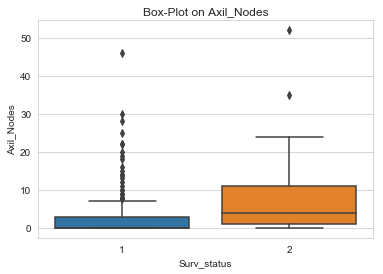

In [26]:
# Box-Plot on Axil_Nodes
sns.boxplot(x='Surv_status', y='Axil_Nodes', data=hb)
plt.title('Box-Plot on Axil_Nodes')
plt.show()

#### Conclusion:
1. More than 50% of patients with Surv_status=2 have axil nodes greater than mean and lies between 4 to 11.  

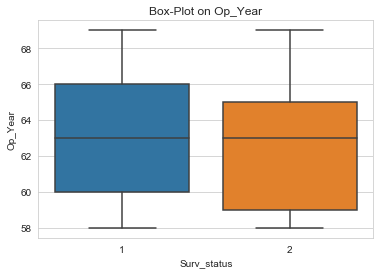

In [27]:
# Box-Plot on Op_Year
sns.boxplot(x='Surv_status', y='Op_Year', data=hb)
plt.title('Box-Plot on Op_Year')
plt.show()

#### Conclusion:
1. Patients with Surv_status=1 lies equally above and below the mean Op_year. But,
2. Patients with Surv_status=2 are more tilted towards early year i.e 1959 to 1963.

### *3. Violin Plot Analysis on Haberman*

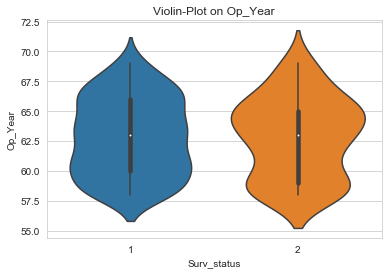

In [28]:
# Violin-Plot on Op_Year
sns.violinplot(x='Surv_status', y='Op_Year', data=hb)
plt.title('Violin-Plot on Op_Year')
plt.show()

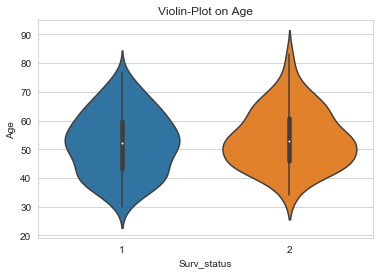

In [30]:
# Violin-Plot on Age
sns.violinplot(x='Surv_status', y='Age', data=hb)
plt.title('Violin-Plot on Age')
plt.show()

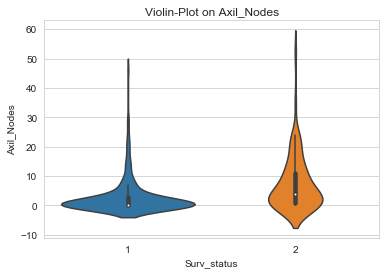

In [33]:
# Violin-Plot on Axil_Nodes
sns.violinplot(x='Surv_status', y='Axil_Nodes', data=hb)
plt.title('Violin-Plot on Axil_Nodes')
plt.show()

#### Conclusions:

1. Violin Plot of **Op_Year vs Surv_status** shows that operations held near 1965 resulted in maximum number of patients with survival duration of more than 5 years.

2. Violin Plot of **Age vs Surv_status** shows that most of patients whose operation occurs at age between 40 -50 survive for more than 5 years. But just a little late age i.e. 50-55 age group operations are shown to be least positive results where patients die within 5 years.

3. Violin Plot of **Axil_Nodes vs Surv_status** shows that critical patients with life expectancy of less than 5 years are having ~zero positive Axil-nodes.

## Bivariate Analysis

### *1. Scatter Plots*

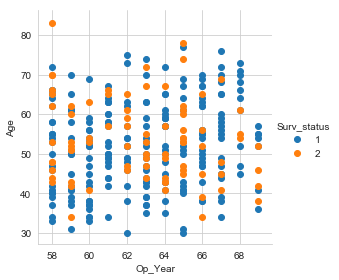

In [16]:
# Scatter-Plot b/w Age and Op_Year 
sns.set_style('whitegrid')
sns.FacetGrid(hb, hue='Surv_status', height=4).map(plt.scatter, "Op_Year", "Age").add_legend()
plt.show()

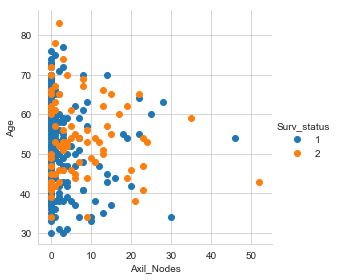

In [17]:
# Scatter-Plot b/w Age and Axil_Nodes
sns.set_style('whitegrid')
sns.FacetGrid(hb, hue='Surv_status', height=4).map(plt.scatter, "Axil_Nodes", "Age").add_legend()
plt.show()

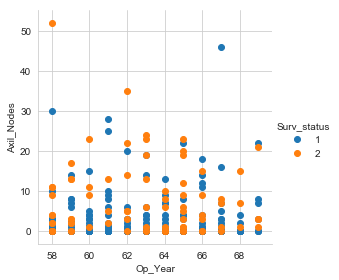

In [18]:
# Scatter-Plot b/w Axil_Nodes and Op_Year
sns.set_style('whitegrid')
sns.FacetGrid(hb, hue='Surv_status', height=4).map(plt.scatter, "Op_Year", "Axil_Nodes").add_legend()
plt.show()

### *2. Pair Plots*

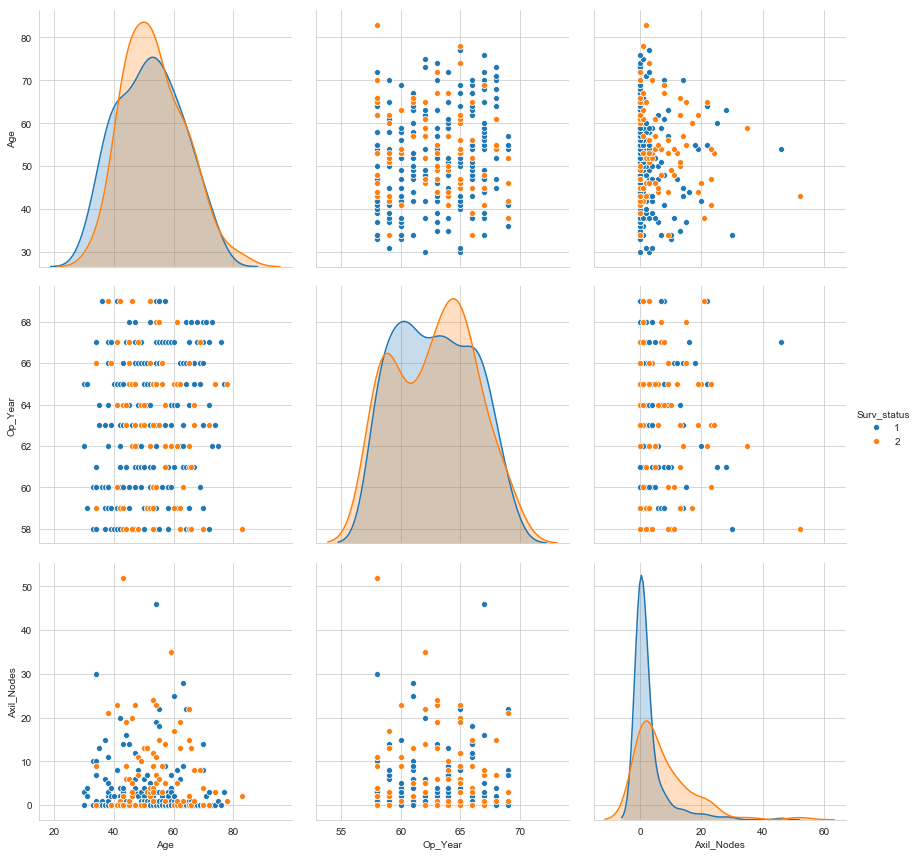

In [19]:
temp=hb.drop('Age',1)
sns.set_style('whitegrid')
sns.pairplot(hb,hue='Surv_status', vars=['Age', 'Op_Year', 'Axil_Nodes'], height=4)
plt.show()

#### Conclusions

1. Remarkably, most of data is overlapping too much to differentiate different survival_status.

### Analysis Observations:

We are dealing with data involving 305 data-points featuring 4 features to classify among two kinds of classes- surv_status=1 and surv_status=2.
#### Few useful observations I analyse, are:

* Patients with surviving status of less than 5 years are more tilted towards early year i.e 1959 to 1963, 

* Operations held near 1965 were mostly successfull as statistics near these year are very high for patients surviving more than 5 years.

* Early age i.e. 40-50 age group's operation gave better results in surviving more people for more than 5 years and later age groups i.e. 50-55 age band survived less than 5 years.

